## Credit Card Data Set

### Installing MiniSom

In [1]:
pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9004 sha256=cbe24ed5b19bad7a7e590e1790ea7d6ad410c135df9bda72f26182a86e09647f
  Stored in directory: c:\users\dipti\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


### Importing Packages

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns


import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Importing Credit Card Data Set

In [32]:
trainfile = r'C:\Users\dipti\Downloads\CC GENERAL.csv'
train_data = pd.read_csv(trainfile) #creates a dataframe

print(train_data.shape)

(8950, 18)


In [33]:
train_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
train_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data Pre-processing

In [36]:
## Replace missing value with a new label
features_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()and train_data[feature].dtypes=='O']

def replace_cat_feature(train_data,features_nan):
    data=train_data.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(train_data,features_nan)

dataset[features_nan].isnull().sum()

Series([], dtype: float64)

In [37]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum() and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

CREDIT_LIMIT: 0.0001% missing value
MINIMUM_PAYMENTS: 0.035% missing value


In [38]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()
    

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64

In [39]:
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMITnan,MINIMUM_PAYMENTSnan
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,0


### Extracting data for training and testing

In [40]:
#Extract training and test data
y_train = dataset["TENURE"]
X_train = dataset.drop(["TENURE",'CUST_ID'], axis=1) #extracting training data without the target column

print(X_train.shape)


(8950, 18)


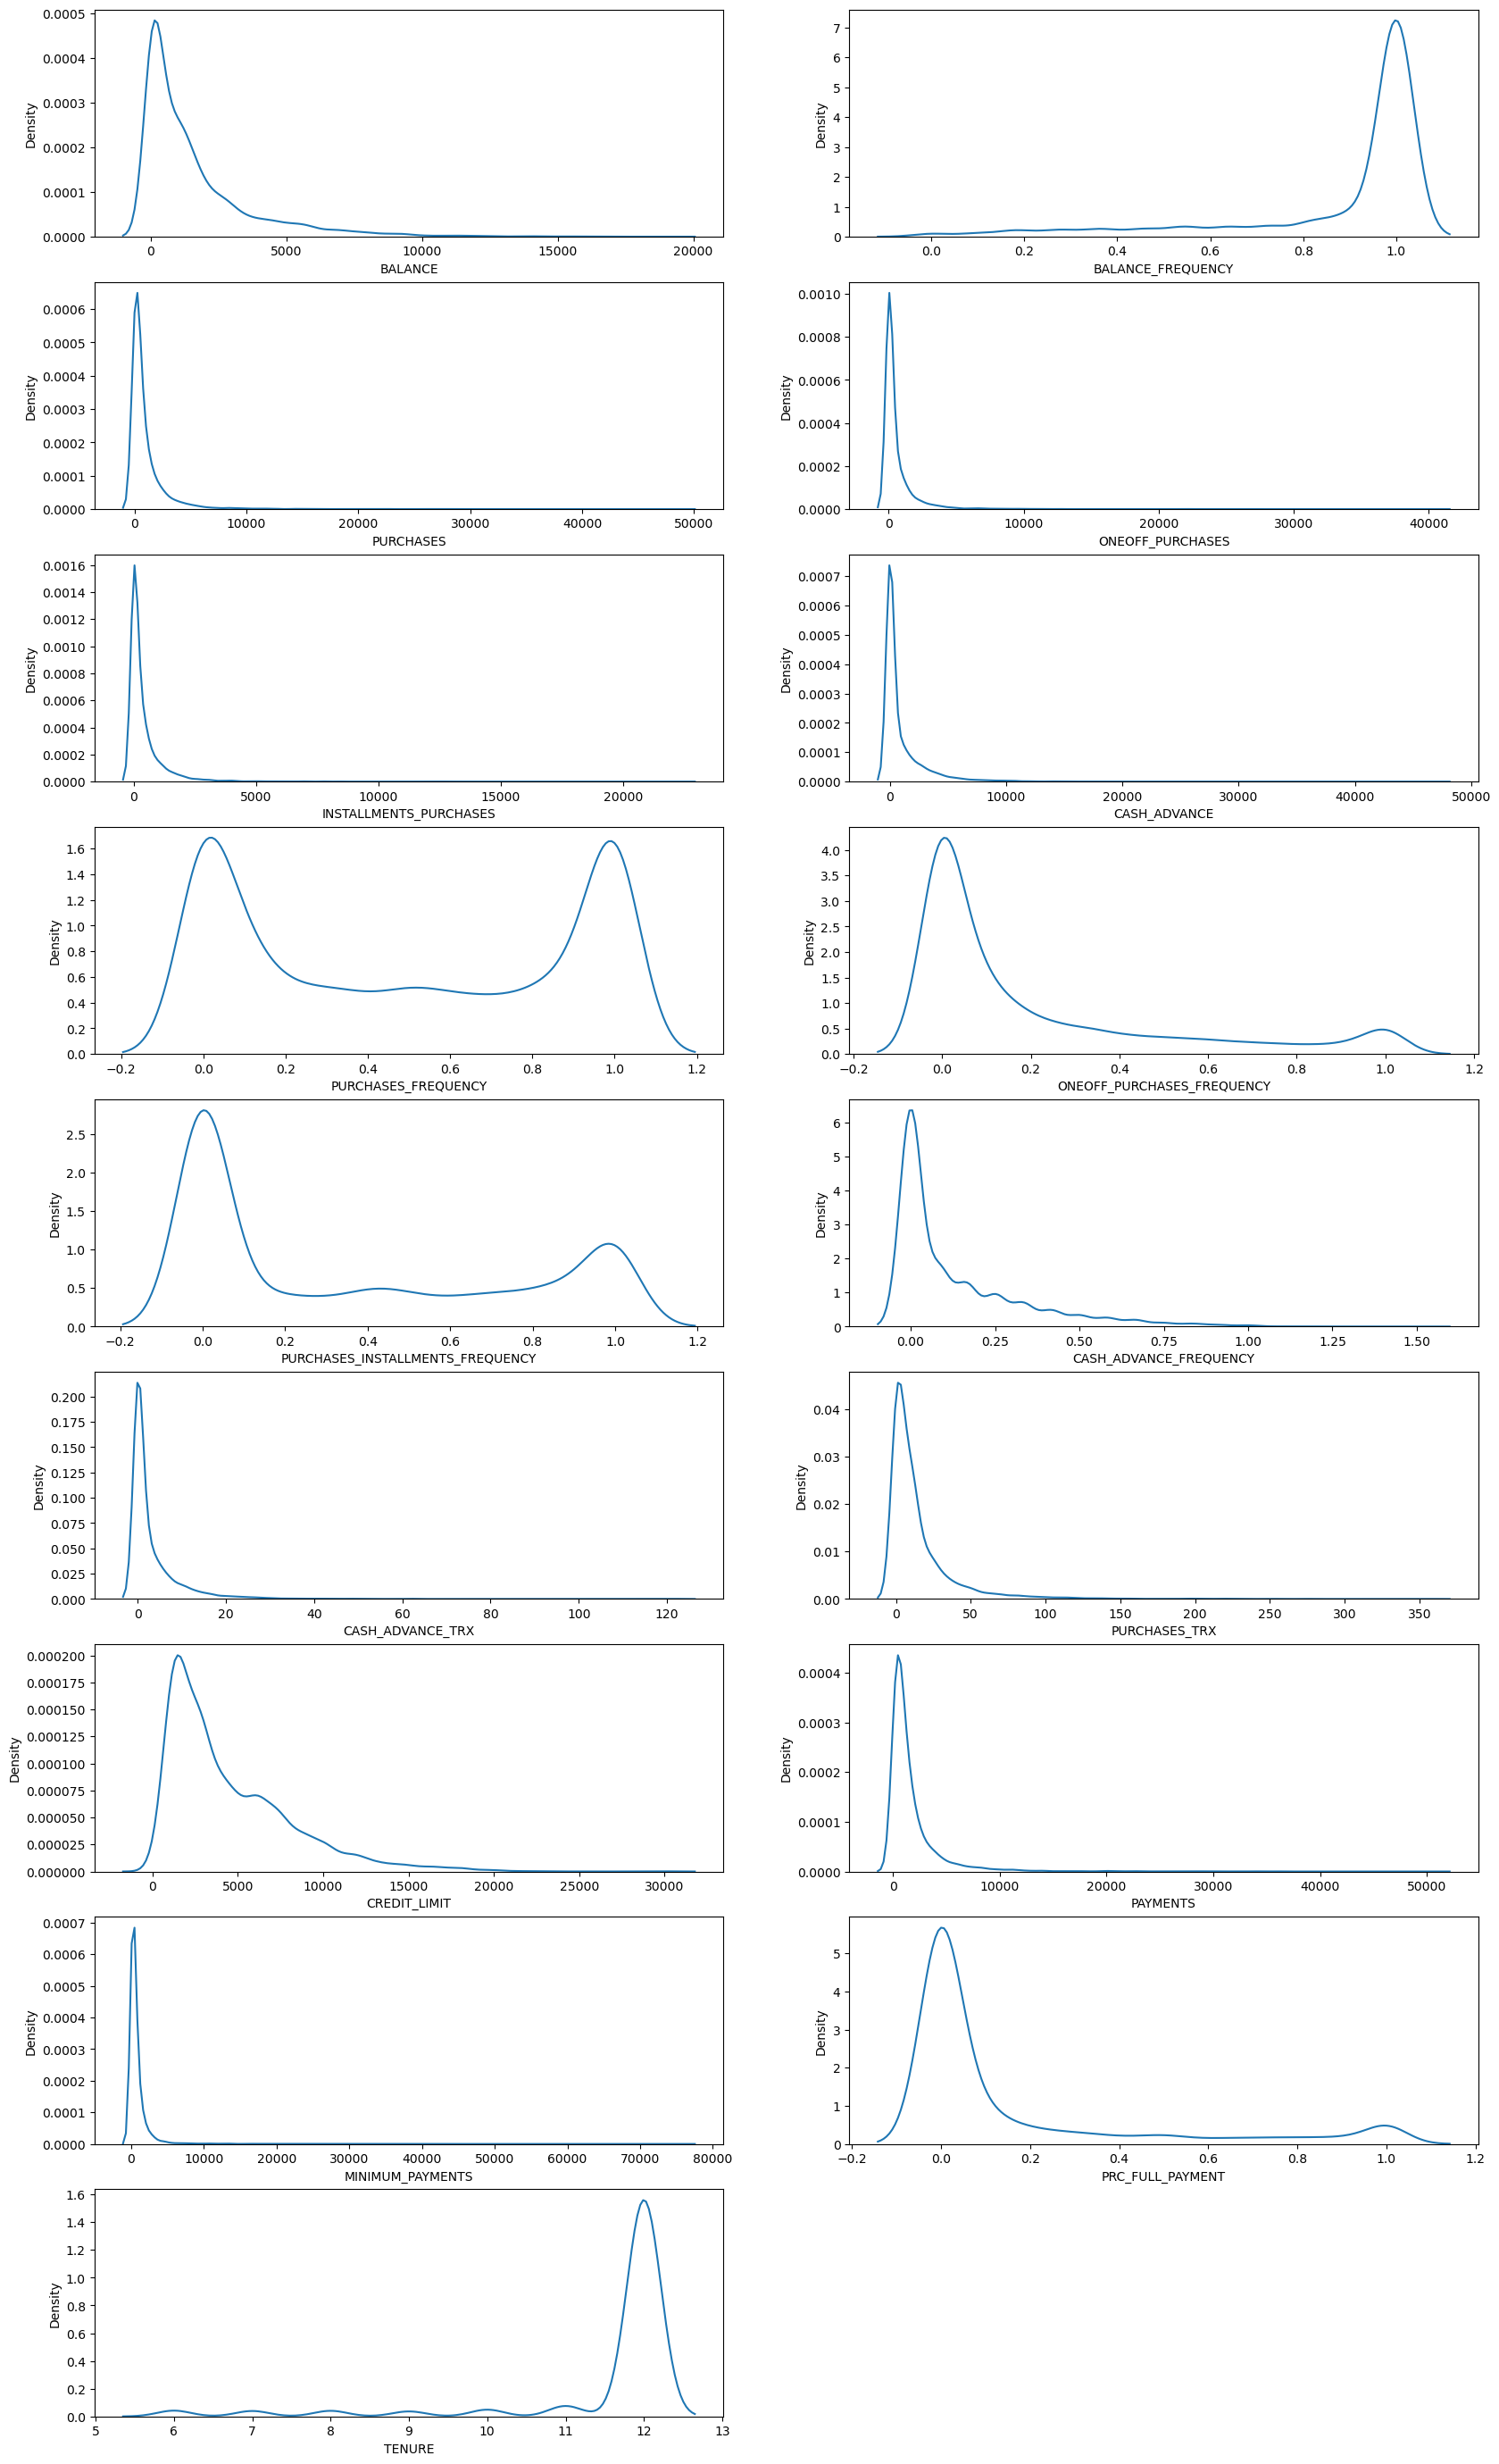

In [15]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

### Plotting some correlation

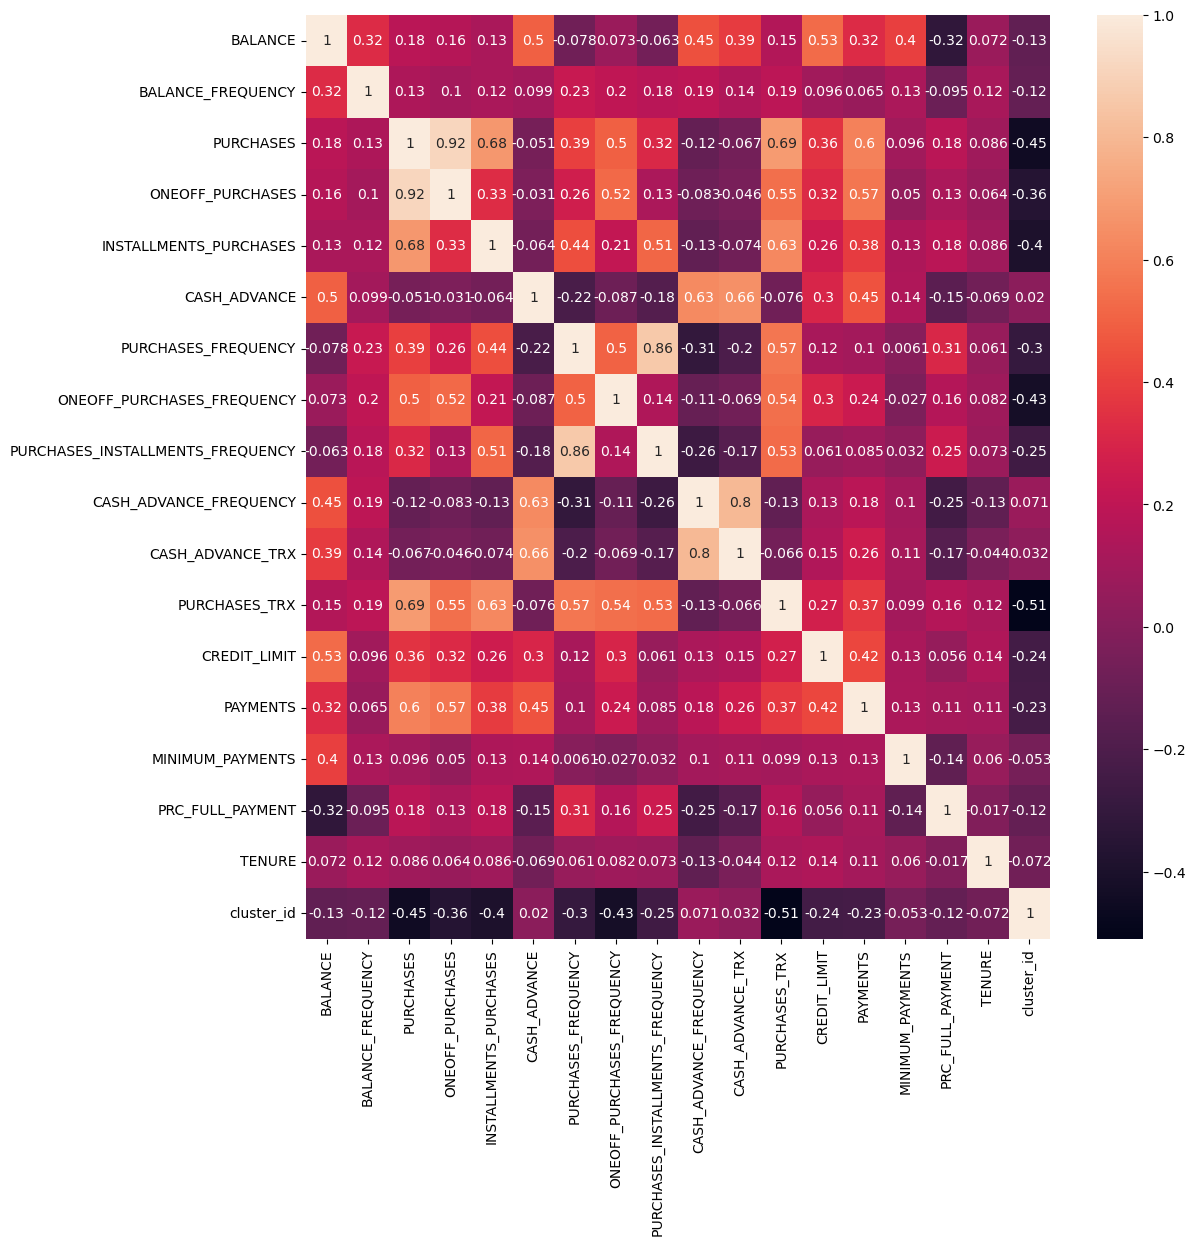

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### The Elbow Method

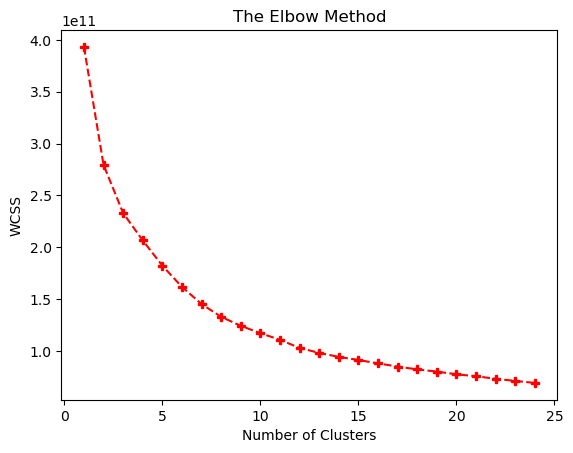

In [41]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,25),wcss,'r--P')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### K-Means Clustering

In [42]:
#K-Means Clustering ========================================================================
# K=20
#X_train = trainData.drop(["TARGET"], axis=1) #extracting training data without the target column
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, init='k-means++', algorithm='elkan',)
kmeans.fit(X_train)
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

#print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

[0 2 2 ... 0 0 0]
[[ 7.97491984e+02  8.50508709e-01  5.23988922e+02  2.57948815e+02
   2.66330846e+02  4.87508974e+02  4.54109776e-01  1.33853201e-01
   3.48271757e-01  1.08952910e-01  2.28716759e+00  9.70230234e+00
   2.27078123e+03  9.19765729e+02  5.05837709e+02  1.48627220e-01
   1.78475817e-04  4.44404783e-02]
 [ 5.68287833e+03  9.53276941e-01  2.71976721e+03  1.70735771e+03
   1.01253822e+03  4.59012384e+03  5.32377253e-01  3.32745724e-01
   4.07229122e-01  3.24518020e-01  1.04052098e+01  3.32850941e+01
   1.13895869e+04  6.62215962e+03  2.08094289e+03  1.14361650e-01
   1.08420217e-19  1.44717800e-03]
 [ 2.03557313e+03  9.11884965e-01  1.33959589e+03  8.33228272e+02
   5.06743798e+02  1.07519788e+03  5.54243513e-01  3.14437225e-01
   3.82892305e-01  1.42686921e-01  3.43378641e+00  1.94815534e+01
   7.37376169e+03  1.93415083e+03  7.51325624e+02  1.75318427e-01
   4.06575815e-19  2.44660194e-02]
 [ 4.05814769e+03  9.88636375e-01  1.02737875e+03  1.18389464e+02
   9.08989286e+02  

In [43]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train.copy()
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

df_kmeans['Cluster Number']=kmeans_predict_train
df_kmeans['TARGET']=y_train
print(df_kmeans.shape)
print(df_kmeans.head())
print(df_kmeans.dtypes)

export_csv = df_kmeans.to_csv(r'C:\Users\dipti\Downloads\Cluster_n=3')


[0 2 2 ... 0 0 0]
(8950, 20)
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          

In [44]:
#K-Means Clustering ========================================================================
# K=20
#X_train = trainData.drop(["TARGET"], axis=1) #extracting training data without the target column
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, init='random', algorithm='elkan')
kmeans.fit(X_train)
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

#print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

[1 0 0 ... 1 1 1]
[[ 3.37682451e+03  9.40893879e-01  1.58394509e+03  9.89334502e+02
   5.94920524e+02  2.08790518e+03  5.41583702e-01  3.18122643e-01
   3.85703944e-01  2.09391585e-01  5.70519481e+00  2.21445887e+01
   8.98030500e+03  2.86666855e+03  1.54831723e+03  1.35186513e-01
   3.65918233e-19  1.51515152e-02]
 [ 8.54405135e+02  8.54038216e-01  6.02012470e+02  3.11449599e+02
   2.90862392e+02  4.94248036e+02  4.67071929e-01  1.53554670e-01
   3.52180372e-01  1.06846882e-01  2.25438057e+00  1.06472487e+01
   2.73720774e+03  9.95831540e+02  5.61933393e+02  1.56728266e-01
   1.53704273e-04  4.25760836e-02]
 [ 4.79720357e+03  9.08473866e-01  1.04707237e+04  7.39299015e+03
   3.07789769e+03  5.38998332e+03  7.37381261e-01  5.82882687e-01
   5.92929851e-01  2.29106075e-01  9.18656716e+00  8.37910448e+01
   1.24705224e+04  1.79906949e+04  2.45794114e+03  3.26799679e-01
  -1.35525272e-20  7.46268657e-03]]
(8950, 18)
0.4653066438735048


In [45]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train.copy()
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

df_kmeans['Cluster Number']=kmeans_predict_train
df_kmeans['TARGET']=y_train
print(df_kmeans.shape)
print(df_kmeans.head())
print(df_kmeans.dtypes)

export_csv = df_kmeans.to_csv(r'C:\Users\dipti\Downloads\Cluster_n=3')


[1 0 0 ... 1 1 1]
(8950, 20)
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          

### Silhouette Score Vs. Number of Clusters

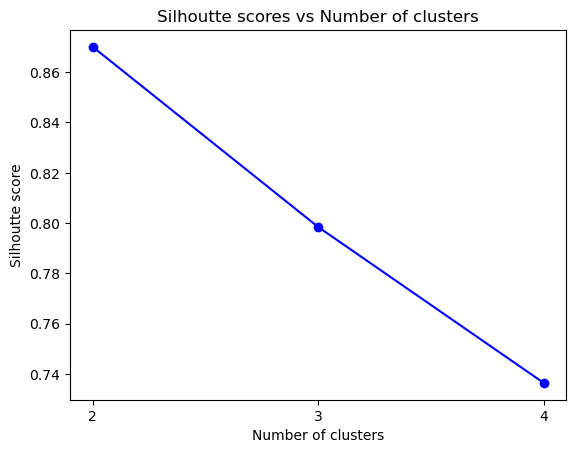

In [22]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

### Silhouette Score of K-Means Clustering Model

In [23]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.8700455999561567


### Plotting Purchase Frequency Cluster

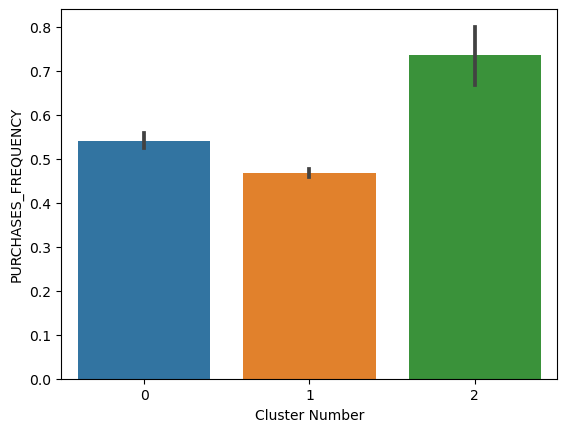

In [46]:
import seaborn as sns
sns.barplot(x="Cluster Number", y="PURCHASES_FREQUENCY", data=df_kmeans);

### Plotting Balance 

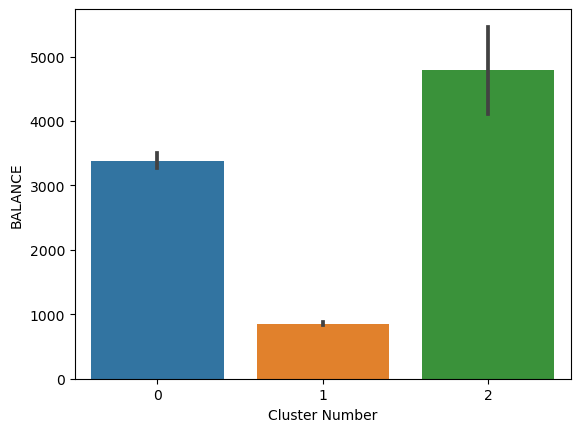

In [47]:
import seaborn as sns
sns.barplot(x="Cluster Number", y="BALANCE", data=df_kmeans);